### Zoe Markovits - Data Mining Project Two
### Predicting Student's Academic Performance

#### Importing, Cleaning, and Exploratory Data Analysis

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/Student_Academic_Performance.csv')
print(df.shape)
print(df.info())

(480, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB
None


In [3]:
# Cleaning column names

df.rename(columns={'gender':'Gender',
                   'NationalITy':'Nationality',
                   'PlaceofBirth':'Place_of_Birth',
                   'StageID':'Education_Level',
                   'GradeID':'Grade_Level',
                   'SectionID':'Section_ID',
                   'Relation':'Parent',
                   'raisedhands':'Raised_Hand',
                   'VisITedResources':'Visited_Resources',
                   'AnnouncementsView':'Viewed_Announcements',
                   'Discussion':'Discussion_Groups',
                   'ParentAnsweringSurvey':'Parent_Answered_Survey',
                   'ParentschoolSatisfaction':'Parent_School_Satisfaction',
                   'StudentAbsenceDays':'Absences',
                   'Class':'Performance'}, inplace=True)

#Reordering columns

df = df[['Performance','Gender','Nationality','Place_of_Birth','Education_Level','Grade_Level','Section_ID','Topic',\
         'Semester','Parent','Raised_Hand','Visited_Resources','Viewed_Announcements','Discussion_Groups',\
         'Parent_Answered_Survey','Parent_School_Satisfaction','Absences']]

In [4]:
df.Performance.value_counts()

M    211
H    142
L    127
Name: Performance, dtype: int64

In [5]:
df.describe()

,Raised_Hand,Visited_Resources,Viewed_Announcements,Discussion_Groups
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
from pandas_profiling import ProfileReport as pfr
pfr(df)

Number of variables,17
Number of observations,480
Total Missing (%),0.0%
Total size in memory,63.8 KiB
Average record size in memory,136.2 B
Numeric,4
Categorical,13
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
# Cleaning column values: 

df['Education_Level'] = df['Education_Level'].map({'MiddleSchool': 'Middle_School',
                                                   'lowerlevel': 'Elementary_School', 
                                                   'HighSchool':'High_School'})

df['Grade_Level'] = df['Grade_Level'].map({'G-02':'Grade_Two',
                                           'G-08':'Grade_Eight',
                                           'G-07':'Grade_Seven',
                                           'G-04':'Grade_Four',
                                           'G-06':'Grade_Six',
                                           'G-11':'Grade_Eleven',
                                           'G-12':'Grade_Twelve',
                                           'G-09':'Grade_Nine',
                                           'G-10':'Grade_Ten',
                                           'G-05':'Grade_Five'})

df['Nationality'] = df['Nationality'].map({'KW':'Kuwait',
                                           'Jordan':'Jordan',
                                           'Palestine':'Palestine',
                                           'Iraq':'Iraq',
                                           'lebanon':'Lebanon',
                                           'Tunis':'Tunis',
                                           'SaudiArabia':'Saudi_Arabia',
                                           'Egypt':'Egypt',
                                           'Syria':'Syria',
                                           'Iran':'Iran',
                                           'USA':'USA',
                                           'Lybia':'Libya',
                                           'Morocco':'Morocco',
                                           'venzuela':'Venezuela'})

df['Parent'] = df['Parent'].map({'Father':'Father',
                                 'Mum':'Mother'})

df['Place_of_Birth'] = df['Place_of_Birth'].map({'KuwaIT':'Kuwait',
                                                 'Jordan':'Jordan',
                                                 'Iraq':'Iraq',
                                                 'lebanon':'Lebanon',
                                                 'USA':'USA',
                                                 'SaudiArabia':'Saudi_Arabia',
                                                 'Palestine':'Palestine',
                                                 'Tunis':'Tunis',
                                                 'Egypt':'Egypt',
                                                 'Syria':'Syria',
                                                 'Iran':'Iran',
                                                 'Lybia':'Libya',
                                                 'Morocco':'Morocco',
                                                 'venzuela':'Venezuela'})

df['Performance'] = df['Performance'].map({'L':'Low',
                                           'M':'Medium',
                                           'H':'High'})

df['Gender'] = df['Gender'].map({'M':'Male',
                                 'F':'Female'})

df['Semester'] = df['Semester'].map({'F':'First',
                                     'S':'Second'})

df['Absences'] = df['Absences'].map({'Under-7':'Under_Seven',
                                     'Above-7':'Over_Seven'})

In [8]:
# Creating dummy variables:

gender_dummies = pd.get_dummies(df.Gender,drop_first=False).astype(int)
nationality_dummies = pd.get_dummies(df.Nationality,drop_first=False).astype(int)
pob_dummies = pd.get_dummies(df.Place_of_Birth,drop_first=False).astype(int)
education_dummies = pd.get_dummies(df.Education_Level,drop_first=False).astype(int)
grade_dummies = pd.get_dummies(df.Grade_Level,drop_first=False).astype(int)
section_dummies = pd.get_dummies(df.Section_ID,drop_first=False).astype(int)
topic_dummies = pd.get_dummies(df.Topic,drop_first=False).astype(int)
semester_dummies = pd.get_dummies(df.Semester,drop_first=False).astype(int)
parent_dummies = pd.get_dummies(df.Parent,drop_first=False).astype(int)
parent_answer_dummies = pd.get_dummies(df.Parent_Answered_Survey,drop_first=False).astype(int)
parent_satisfy_dummies = pd.get_dummies(df.Parent_School_Satisfaction,drop_first=False).astype(int)
absence_dummies = pd.get_dummies(df.Absences,drop_first=False).astype(int)

df = pd.concat([df,gender_dummies,nationality_dummies,pob_dummies,education_dummies,grade_dummies,section_dummies, \
                topic_dummies,semester_dummies,parent_dummies,parent_answer_dummies,parent_satisfy_dummies, \
                absence_dummies],axis=1)           

In [9]:
print(df.shape)
df.head(10)

(480, 85)


,Performance,Gender,Nationality,Place_of_Birth,Education_Level,Grade_Level,Section_ID,Topic,Semester,Parent,Raised_Hand,Visited_Resources,Viewed_Announcements,Discussion_Groups,Parent_Answered_Survey,Parent_School_Satisfaction,Absences,Female,Male,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Palestine,Saudi_Arabia,Syria,Tunis,USA,Venezuela,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Palestine,Saudi_Arabia,Syria,Tunis,USA,Venezuela,Elementary_School,High_School,Middle_School,Grade_Eight,Grade_Eleven,Grade_Five,Grade_Four,Grade_Nine,Grade_Seven,Grade_Six,Grade_Ten,Grade_Twelve,Grade_Two,A,B,C,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,First,Second,Father,Mother,No,Yes,Bad,Good,Over_Seven,Under_Seven
0,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,15,16,2,20,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
1,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,20,20,3,25,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
2,Low,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,10,7,0,30,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,Low,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,30,25,5,35,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,40,50,12,50,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
5,Medium,Female,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,42,30,13,70,Yes,Bad,Over_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
6,Low,Male,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,35,12,0,17,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
7,Medium,Male,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,50,10,15,22,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
8,Medium,Female,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,12,21,16,50,Yes,Good,Under_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
9,Medium,Female,Kuwait,Kuwait,Middle_School,Grade_Seven,B,IT,First,Father,70,80,25,70,Yes,Good,Under_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1


In [10]:
df.groupby('Gender').Performance.value_counts()

Gender  Performance
Female  Medium          76
        High            75
        Low             24
Male    Medium         135
        Low            103
        High            67
Name: Performance, dtype: int64

In [11]:
df.groupby('Parent').Performance.value_counts()

Parent  Performance
Father  Medium         137
        Low            104
        High            42
Mother  High           100
        Medium          74
        Low             23
Name: Performance, dtype: int64

#### Classification

In [12]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [13]:
X = df.drop(['Performance','Gender','Nationality','Place_of_Birth','Education_Level','Grade_Level','Section_ID',\
             'Topic','Semester','Parent','Parent_Answered_Survey','Parent_School_Satisfaction','Absences'], axis=1)
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Naive Bayes

In [14]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_predict = GNB.predict(X_test)

GNB_accuracy = accuracy_score(y_test, GNB_predict)
GNB_precision = precision_score(y_test, GNB_predict, average='macro')
GNB_recall = recall_score(y_test, GNB_predict, average='macro')
GNB_f1 = f1_score(y_test, GNB_predict, average='macro')

print(GNB_accuracy)
print(GNB_precision)
print(GNB_recall)
print(GNB_f1)

0.5208333333333334
0.5726094276094277
0.6381046058465413
0.5277499721944167


In [15]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, GNB_predict))

Confusion Matrix:
 [[31  5  3]
 [ 0 28  3]
 [41 17 16]]


In [16]:
print("Classification Report:\n", metrics.classification_report(y_test, GNB_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.79      0.56        39
         Low       0.56      0.90      0.69        31
      Medium       0.73      0.22      0.33        74

   micro avg       0.52      0.52      0.52       144
   macro avg       0.57      0.64      0.53       144
weighted avg       0.61      0.52      0.47       144



K-Nearest Neighbors

In [17]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_predict = KNN.predict(X_test)

KNN_accuracy = accuracy_score(y_test, KNN_predict)
KNN_precision = precision_score(y_test, KNN_predict, average='macro')
KNN_recall = recall_score(y_test, KNN_predict, average='macro')
KNN_f1 = f1_score(y_test, KNN_predict, average='macro')

print(KNN_accuracy)
print(KNN_precision)
print(KNN_recall)
print(KNN_f1)

0.5763888888888888
0.5651222651222652
0.5885103465748628
0.5747190689141153


In [18]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, KNN_predict))

Confusion Matrix:
 [[16  2 21]
 [ 1 24  6]
 [20 11 43]]


In [19]:
print("Classification Report:\n", metrics.classification_report(y_test, KNN_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.41      0.42        39
         Low       0.65      0.77      0.71        31
      Medium       0.61      0.58      0.60        74

   micro avg       0.58      0.58      0.58       144
   macro avg       0.57      0.59      0.57       144
weighted avg       0.57      0.58      0.57       144



Logistic Regression

In [20]:
LogReg = LogisticRegression(random_state=1234)
LogReg.fit(X_train, y_train)
LogReg_predict = LogReg.predict(X_test)

LogReg_accuracy = accuracy_score(y_test, LogReg_predict)
LogReg_precision = precision_score(y_test, LogReg_predict, average='macro')
LogReg_recall = recall_score(y_test, LogReg_predict, average='macro')
LogReg_f1 = f1_score(y_test, LogReg_predict, average='macro')

print(LogReg_accuracy)
print(LogReg_precision)
print(LogReg_recall)
print(LogReg_f1)

0.6875
0.6870149819458575
0.7131349711994873
0.6951871657754011


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, LogReg_predict))

Confusion Matrix:
 [[29  1  9]
 [ 0 24  7]
 [20  8 46]]


In [22]:
print("Classification Report:\n", metrics.classification_report(y_test, LogReg_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.74      0.66        39
         Low       0.73      0.77      0.75        31
      Medium       0.74      0.62      0.68        74

   micro avg       0.69      0.69      0.69       144
   macro avg       0.69      0.71      0.70       144
weighted avg       0.70      0.69      0.69       144



In [23]:
features = zip(list(LogReg.coef_[0]), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(1.3283210439229176, 'Saudi_Arabia'),
 (1.1645112528444546, 'Under_Seven'),
 (0.7608290968952846, 'Math'),
 (0.7290715401023832, 'Grade_Four'),
 (0.7133796925037285, 'Chemistry'),
 (0.4927867817861717, 'Biology'),
 (0.46756623462789765, 'Saudi_Arabia'),
 (0.3700941726049917, 'Elementary_School'),
 (0.23560245995303275, 'Mother'),
 (0.1877669676887234, 'Quran'),
 (0.16324689286213434, 'Tunis'),
 (0.15227359619631453, 'Iraq'),
 (0.15227359619631453, 'Iraq'),
 (0.13325390798199674, 'USA'),
 (0.09130150432276216, 'Grade_Six'),
 (0.06957895438952866, 'Lebanon'),
 (0.026681366256048063, 'Raised_Hand'),
 (0.02484145710935994, 'Visited_Resources'),
 (0.010577078248743049, 'Syria'),
 (0.010577078248743049, 'Syria'),
 (0.010201864050651951, 'Discussion_Groups'),
 (0.0, 'Venezuela'),
 (0.0, 'Venezuela'),
 (-0.0002049794636147361, 'Grade_Ten'),
 (-0.0024066953507224757, 'Viewed_Announcements'),
 (-0.01253642513494809, 'Grade_Five'),
 (-0.01827414534840201, 'Yes'),
 (-0.019407601014002053, 'Arabic

Support Vector Machine

In [24]:
SVM = svm.SVC(kernel='linear', random_state=1234)
SVM.fit(X_train,y_train)
SVM_predict = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, SVM_predict)
SVM_precision = precision_score(y_test, SVM_predict, average='macro')
SVM_recall = recall_score(y_test, SVM_predict, average='macro')
SVM_f1 = f1_score(y_test, SVM_predict, average='macro')

print(SVM_accuracy)
print(SVM_precision)
print(SVM_recall)
print(SVM_f1)

0.6944444444444444
0.7028985507246377
0.7011006043264109
0.6996768952402054


In [25]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, SVM_predict))

Confusion Matrix:
 [[28  0 11]
 [ 0 22  9]
 [18  6 50]]


In [26]:
print("Classification Report:\n", metrics.classification_report(y_test, SVM_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.72      0.66        39
         Low       0.79      0.71      0.75        31
      Medium       0.71      0.68      0.69        74

   micro avg       0.69      0.69      0.69       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.70      0.69      0.70       144



In [27]:
features = zip(list(SVM.coef_[0]), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(1.1309299277652083, 'Under_Seven'),
 (0.6247201758202257, 'Female'),
 (0.4935688667308459, 'History'),
 (0.4025542002453588, 'Yes'),
 (0.35851774302750916, 'Saudi_Arabia'),
 (0.35851774302750916, 'Geology'),
 (0.296863089058061, 'Palestine'),
 (0.296863089058061, 'Grade_Six'),
 (0.27404739787159343, 'C'),
 (0.24599388115226162, 'Grade_Four'),
 (0.21040681870142006, 'English'),
 (0.19597608487957863, 'Second'),
 (0.19357846944209056, 'French'),
 (0.14533524870018066, 'Elementary_School'),
 (0.13774198101311635, 'Grade_Seven'),
 (0.13774198101311635, 'Biology'),
 (0.1277713302356268, 'Mother'),
 (0.1023428332452462, 'Math'),
 (0.10189437437363158, 'A'),
 (0.027090092683948797, 'Viewed_Announcements'),
 (0.020034553328848848, 'Good'),
 (0.018006326481753376, 'Discussion_Groups'),
 (0.015223629002258406, 'Iraq'),
 (0.015223629002258406, 'Iraq'),
 (0.015191127953073646, 'Visited_Resources'),
 (0.003287534671926551, 'Raised_Hand'),
 (0.0, 'Iran'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0,

Decision Tree

In [28]:
DecisionTree = DecisionTreeClassifier(random_state=1234, max_depth=4)
DecisionTree.fit(X_train,y_train)
DecisionTree_predict = DecisionTree.predict(X_test)

DecisionTree_accuracy = accuracy_score(y_test, DecisionTree_predict)
DecisionTree_precision = precision_score(y_test, DecisionTree_predict, average='macro')
DecisionTree_recall = recall_score(y_test, DecisionTree_predict, average='macro')
DecisionTree_f1 = f1_score(y_test, DecisionTree_predict, average='macro')

print(DecisionTree_accuracy)
print(DecisionTree_precision)
print(DecisionTree_recall)
print(DecisionTree_f1)

0.6319444444444444
0.627436259789201
0.6366738947384109
0.6312589512589514


In [29]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, DecisionTree_predict))

Confusion Matrix:
 [[19  1 19]
 [ 0 24  7]
 [17  9 48]]


In [30]:
print("Classification Report:\n", metrics.classification_report(y_test, DecisionTree_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.53      0.49      0.51        39
         Low       0.71      0.77      0.74        31
      Medium       0.65      0.65      0.65        74

   micro avg       0.63      0.63      0.63       144
   macro avg       0.63      0.64      0.63       144
weighted avg       0.63      0.63      0.63       144



In [31]:
features = zip(list(DecisionTree.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.3755179953893554, 'Under_Seven'),
 (0.3285141430672835, 'Visited_Resources'),
 (0.13852552570060214, 'Raised_Hand'),
 (0.08669170605537634, 'Discussion_Groups'),
 (0.04408741457472104, 'Viewed_Announcements'),
 (0.013877803025474233, 'High_School'),
 (0.012785412187187352, 'Saudi_Arabia'),
 (0.0, 'Female'),
 (0.0, 'Male'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Elementary_School'),
 (0.0, 'Middle_School'),
 (0.0, 'Grade_Eight'),
 (0.0, 'Grade_Eleven'),
 (0.0, 'Grade_Five'),
 (0.0, 'Grade_Four'),
 (0.0, 'Grade_Nine'),
 (0.0, 'Grade_Seve

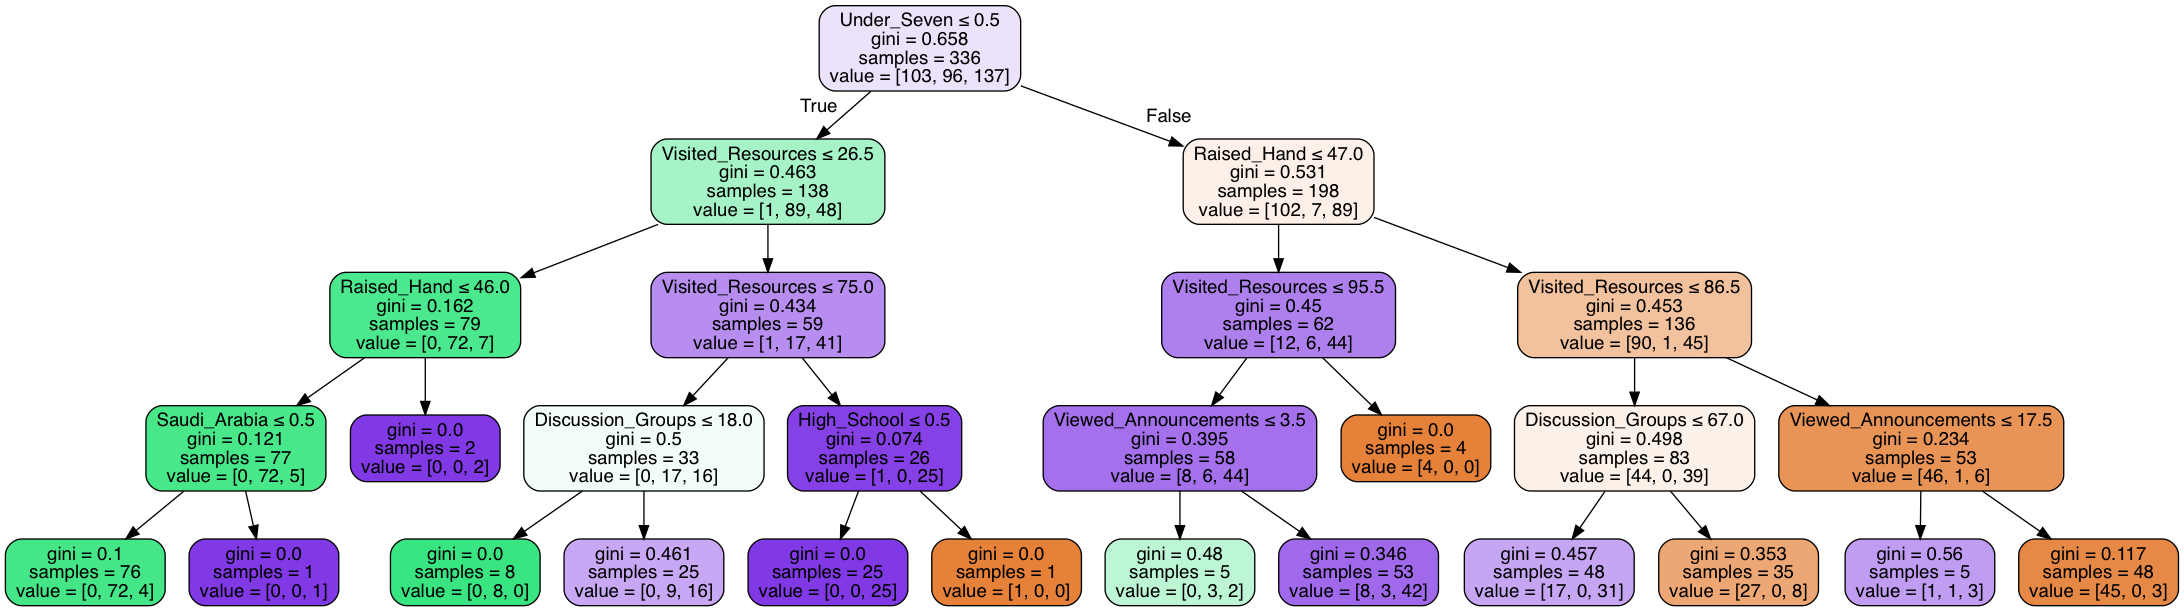

In [32]:
dot_data = StringIO()  
export_graphviz(DecisionTree, out_file=dot_data,  
                    feature_names=X.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Random Forest

In [33]:
RandomForest = RandomForestClassifier(random_state=1234)
RandomForest.fit(X_train,y_train)
RandomForest_predict = RandomForest.predict(X_test)

RandomForest_accuracy = accuracy_score(y_test, RandomForest_predict)
RandomForest_precision = precision_score(y_test, RandomForest_predict, average='macro')
RandomForest_recall = recall_score(y_test, RandomForest_predict, average='macro')
RandomForest_f1 = f1_score(y_test, RandomForest_predict, average='macro')

print(RandomForest_accuracy)
print(RandomForest_precision)
print(RandomForest_recall)
print(RandomForest_f1)

0.7291666666666666
0.7209075660728047
0.7589065492291299
0.7350847453253969


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, RandomForest_predict))

Confusion Matrix:
 [[29  0 10]
 [ 0 27  4]
 [14 11 49]]


In [35]:
print("Classification Report:\n", metrics.classification_report(y_test, RandomForest_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.74      0.71        39
         Low       0.71      0.87      0.78        31
      Medium       0.78      0.66      0.72        74

   micro avg       0.73      0.73      0.73       144
   macro avg       0.72      0.76      0.74       144
weighted avg       0.74      0.73      0.73       144



In [36]:
features= zip(list(RandomForest.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.14925291156074108, 'Raised_Hand'),
 (0.10801866180754527, 'Visited_Resources'),
 (0.0950066203555042, 'Viewed_Announcements'),
 (0.09270273617618743, 'Under_Seven'),
 (0.06921399073449169, 'Over_Seven'),
 (0.06277009951293261, 'Discussion_Groups'),
 (0.042132735722218775, 'No'),
 (0.03671970896641495, 'Father'),
 (0.02695985978668894, 'Good'),
 (0.01957886999075049, 'Yes'),
 (0.016111869439363366, 'Male'),
 (0.015616235372328872, 'Jordan'),
 (0.014947342668569091, 'Kuwait'),
 (0.012823175398735282, 'Female'),
 (0.012503106318411946, 'Grade_Two'),
 (0.011880976365778045, 'Bad'),
 (0.011340315046644324, 'Kuwait'),
 (0.009852209407650908, 'Grade_Six'),
 (0.009033353483253704, 'Jordan'),
 (0.008789336044326159, 'Arabic'),
 (0.008403801468824022, 'Second'),
 (0.008380925534919249, 'Spanish'),
 (0.008232895615877854, 'Elementary_School'),
 (0.007544921770929021, 'Geology'),
 (0.007537689671407067, 'Middle_School'),
 (0.007021720294166069, 'B'),
 (0.006925607392262133, 'Palestine'),
 (0.0

AdaBoost

In [37]:
AdaBoost = AdaBoostClassifier(random_state=1234)
AdaBoost.fit(X_train,y_train)
AdaBoost_predict = AdaBoost.predict(X_test)

AdaBoost_accuracy = accuracy_score(y_test, AdaBoost_predict)
AdaBoost_precision = precision_score(y_test, AdaBoost_predict, average='macro')
AdaBoost_recall = recall_score(y_test, AdaBoost_predict, average='macro')
AdaBoost_f1 = f1_score(y_test, AdaBoost_predict, average='macro')

print(AdaBoost_accuracy)
print(AdaBoost_precision)
print(AdaBoost_recall)
print(AdaBoost_f1)

0.5972222222222222
0.6115053032725722
0.6321582128033741
0.6150218541522889


In [38]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, AdaBoost_predict))

Confusion Matrix:
 [[25  1 13]
 [ 0 23  8]
 [28  8 38]]


In [39]:
print("Classification Report:\n", metrics.classification_report(y_test, AdaBoost_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.64      0.54        39
         Low       0.72      0.74      0.73        31
      Medium       0.64      0.51      0.57        74

   micro avg       0.60      0.60      0.60       144
   macro avg       0.61      0.63      0.62       144
weighted avg       0.61      0.60      0.60       144



In [40]:
features = zip(list(AdaBoost.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.14, 'Visited_Resources'),
 (0.14, 'Over_Seven'),
 (0.1, 'Raised_Hand'),
 (0.1, 'Discussion_Groups'),
 (0.08, 'Bad'),
 (0.08, 'Under_Seven'),
 (0.06, 'Viewed_Announcements'),
 (0.06, 'Grade_Eight'),
 (0.06, 'No'),
 (0.04, 'Grade_Four'),
 (0.02, 'Female'),
 (0.02, 'Chemistry'),
 (0.02, 'Math'),
 (0.02, 'First'),
 (0.02, 'Mother'),
 (0.02, 'Yes'),
 (0.02, 'Good'),
 (0.0, 'Male'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Elementary_School'),
 (0.0, 'High_School'),
 (0.0, 'Middle_School'),
 (0.0, 'Grade_Eleven'),
 (0.0

GradientBoost

In [41]:
GradientBoost = GradientBoostingClassifier(random_state=1234)
GradientBoost.fit(X_train,y_train)
GradientBoost_predict = GradientBoost.predict(X_test)

GradientBoost_accuracy = accuracy_score(y_test, GradientBoost_predict)
GradientBoost_precision = precision_score(y_test, GradientBoost_predict, average='macro')
GradientBoost_recall = recall_score(y_test, GradientBoost_predict, average='macro')
GradientBoost_f1 = f1_score(y_test, GradientBoost_predict, average='macro')

print(GradientBoost_accuracy)
print(GradientBoost_precision)
print(GradientBoost_recall)
print(GradientBoost_f1)

0.6805555555555556
0.6774799274799275
0.6862122668574283
0.6815690492916521


In [42]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, GradientBoost_predict))

Confusion Matrix:
 [[25  0 14]
 [ 0 23  8]
 [14 10 50]]


In [43]:
print("Classification Report:\n", metrics.classification_report(y_test, GradientBoost_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.64      0.64        39
         Low       0.70      0.74      0.72        31
      Medium       0.69      0.68      0.68        74

   micro avg       0.68      0.68      0.68       144
   macro avg       0.68      0.69      0.68       144
weighted avg       0.68      0.68      0.68       144



In [44]:
features = zip(list(GradientBoost.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.24542892872704897, 'Visited_Resources'),
 (0.17290507635084376, 'Over_Seven'),
 (0.17125383470130476, 'Raised_Hand'),
 (0.10979407420796582, 'Under_Seven'),
 (0.06212406470553083, 'Viewed_Announcements'),
 (0.055656195814217164, 'Discussion_Groups'),
 (0.01751727831597192, 'No'),
 (0.017042723497724517, 'Father'),
 (0.016612911685225742, 'Mother'),
 (0.011428890829179902, 'Male'),
 (0.011182472283414489, 'Saudi_Arabia'),
 (0.011014677427883812, 'Grade_Eight'),
 (0.010822965590419249, 'Yes'),
 (0.008112405912445973, 'Grade_Four'),
 (0.005816978947826511, 'Arabic'),
 (0.005629354113584126, 'Palestine'),
 (0.0054902135210995765, 'IT'),
 (0.005448971847114197, 'Good'),
 (0.00534656404534161, 'Female'),
 (0.0047470650726008186, 'History'),
 (0.004232003138622911, 'Math'),
 (0.003759684129266515, 'Middle_School'),
 (0.0033506863319062645, 'Geology'),
 (0.003049366519044368, 'Grade_Six'),
 (0.002986551843498119, 'Bad'),
 (0.0028969985158774324, 'Jordan'),
 (0.002703111096482041, 'English'

Model Evaluation

In [45]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Accuracy Score': [KNN_accuracy,GNB_accuracy,SVM_accuracy,LogReg_accuracy,DecisionTree_accuracy,\
                       RandomForest_accuracy,AdaBoost_accuracy,GradientBoost_accuracy]})
model_evaluation.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
5,Random Forest,0.729167
2,SVM,0.694444
3,Logistic Regression,0.687500
7,Gradient Boost,0.680556
4,Decision Tree,0.631944
6,AdaBoost,0.597222
0,KNN,0.576389
1,Naive Bayes,0.520833


In [46]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Precision Score': [KNN_precision,GNB_precision,SVM_precision,LogReg_precision,DecisionTree_precision,\
                        RandomForest_precision,AdaBoost_precision,GradientBoost_precision]})
model_evaluation.sort_values(by='Precision Score', ascending=False)

,Model,Precision Score
5,Random Forest,0.720908
2,SVM,0.702899
3,Logistic Regression,0.687015
7,Gradient Boost,0.677480
4,Decision Tree,0.627436
6,AdaBoost,0.611505
1,Naive Bayes,0.572609
0,KNN,0.565122


In [47]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Recall Score': [KNN_recall,GNB_recall,SVM_recall,LogReg_recall,DecisionTree_recall,RandomForest_recall,\
                     AdaBoost_recall,GradientBoost_recall]})
model_evaluation.sort_values(by='Recall Score', ascending=False)

,Model,Recall Score
5,Random Forest,0.758907
3,Logistic Regression,0.713135
2,SVM,0.701101
7,Gradient Boost,0.686212
1,Naive Bayes,0.638105
4,Decision Tree,0.636674
6,AdaBoost,0.632158
0,KNN,0.588510


In [48]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'F-1 Score': [KNN_f1,GNB_f1,SVM_f1,LogReg_f1,DecisionTree_f1,RandomForest_f1,AdaBoost_f1,GradientBoost_f1]})
model_evaluation.sort_values(by='F-1 Score', ascending=False)

,Model,F-1 Score
5,Random Forest,0.735085
2,SVM,0.699677
3,Logistic Regression,0.695187
7,Gradient Boost,0.681569
4,Decision Tree,0.631259
6,AdaBoost,0.615022
0,KNN,0.574719
1,Naive Bayes,0.527750


In [49]:
df_report = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/Student_Confusion_Matrix.csv')
df_report.head()

,Evaluation Metrics,KNN,Naive Bayes,Logistic Regression,Decision Tree,Random Forest,SVM,AdaBoost,GradientBoost
0,Accuracy,0.576389,0.520833,0.687500,0.631944,0.729167,0.694444,0.597222,0.680556
1,Precision,0.565122,0.572609,0.687015,0.627436,0.720908,0.702899,0.611505,0.674800
2,Recall,0.588510,0.638105,0.713135,0.636674,0.758907,0.701101,0.632158,0.686212
3,F1,0.574719,0.527750,0.695187,0.631259,0.735085,0.699677,0.615022,0.681569


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

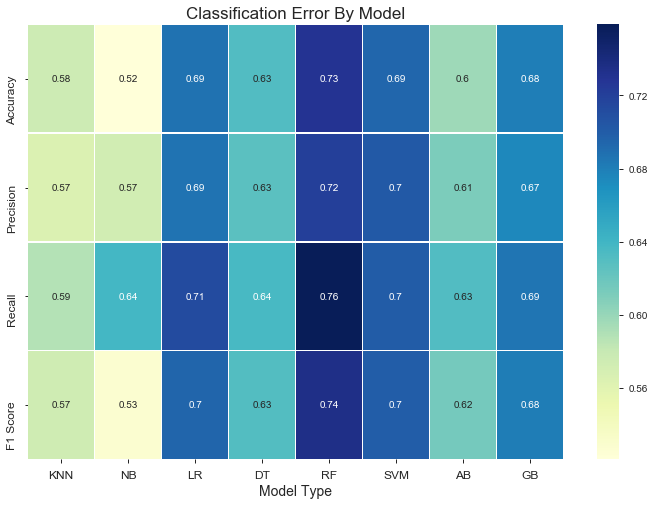

In [57]:
f, ax = plt.subplots(figsize=(12, 8))

xticks = ['KNN','NB','LR','DT','RF','SVM','AB','GB']
yticks = ['Accuracy','Precision','Recall','F1 Score']

sns.heatmap(df_report[['KNN','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','SVM','AdaBoost','GradientBoost']],\
            annot=True, linewidths=.5, ax=ax, yticklabels=yticks, xticklabels=xticks, cmap="YlGnBu")

plt.title('Classification Error By Model', fontsize=17)
plt.xlabel('Model Type', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)

Best Models: Random Forest and SVM